### Limpieza_5
___


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [35]:
df = pd.read_csv("data/bank_clean3.csv", index_col = 0)
pd.options.display.max_columns = None
df.head(1)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,"emp,var,rate","cons,price,idx","cons,conf,idx",euribor3m,"nr,employed",y,month_day_week,month,day
0,56.0,housemaid,married,NaN,No,No,No,telephone,261,1.0,999,0,nonexistent,NaN,93.994,-36.4,4.857,"5191,0",no,"may, mon",may,mon


In [36]:
df.reset_index(inplace = True)

1. Es el momento de eliminar los nulos:

- Reemplazad los valores nulos del resto de las columnas categóricas por la moda, usando el método SimpleImputer.


In [37]:
df.stb.missing()

,missing,total,percent
education,13943,41186,33.853737
"emp,var,rate",12771,41186,31.008110
y,12751,41186,30.959549
loan,8942,41186,21.711261
default,8597,41186,20.873598
marital,8203,41186,19.916962
job,4591,41186,11.146992
age,4302,41186,10.445297
"cons,price,idx",4300,41186,10.440441
housing,990,41186,2.403729


In [38]:
categoricas = df.select_dtypes(include = 'object').columns

In [39]:
categoricas

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'nr,employed', 'y', 'month_day_week', 'month', 'day'],
      dtype='object')

In [40]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

In [41]:
imputer = imputer.fit(df[categoricas])

In [42]:
df[categoricas] = imputer.transform(df[categoricas])

In [43]:
df.stb.missing()

,missing,total,percent
"emp,var,rate",12771,41186,31.008110
age,4302,41186,10.445297
"cons,price,idx",4300,41186,10.440441
campaign,432,41186,1.048900
index,0,41186,0.000000
poutcome,0,41186,0.000000
month,0,41186,0.000000
month_day_week,0,41186,0.000000
y,0,41186,0.000000
"nr,employed",0,41186,0.000000


- Utilizad el método Iterative Imputer para reemplazar todos los valores nulos de las columnas numéricas.

In [46]:
numericas = df.select_dtypes(np.number)

In [70]:
iterative_imputer = IterativeImputer()

In [71]:
iterative_imputer.fit(numericas)

IterativeImputer()

In [75]:
df_iterative = pd.DataFrame(iterative_imputer.transform(numericas), columns = numericas.columns)

In [76]:
df_iterative.isnull().sum()

index             0
age               0
duration          0
campaign          0
pdays             0
previous          0
emp,var,rate      0
cons,price,idx    0
cons,conf,idx     0
euribor3m         0
dtype: int64

In [77]:
df[numericas.columns] = df_iterative[numericas.columns]

In [78]:
df.isnull().sum()

index             0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp,var,rate      0
cons,price,idx    0
cons,conf,idx     0
euribor3m         0
nr,employed       0
y                 0
month_day_week    0
month             0
day               0
age_knn           0
age_simple        0
dtype: int64

- Reemplazad los valores nulos de la columna age por la media de la edad usando el método KNN Imputer.

In [45]:
imputerKNN = KNNImputer(n_neighbors = 5)

In [48]:
imputerKNN = imputerKNN.fit(numericas)

In [49]:
numericas_KNN = imputerKNN.transform(numericas)

In [50]:
df_num = pd.DataFrame(numericas_KNN, columns = numericas.columns)

In [51]:
df_num.isna().sum()

index             0
age               0
duration          0
campaign          0
pdays             0
previous          0
emp,var,rate      0
cons,price,idx    0
cons,conf,idx     0
euribor3m         0
dtype: int64

In [52]:
df['age_knn'] = df_num['age']

In [56]:
df.isnull().sum()

index                 0
age                4302
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
duration              0
campaign            432
pdays                 0
previous              0
poutcome              0
emp,var,rate      12771
cons,price,idx     4300
cons,conf,idx         0
euribor3m             0
nr,employed           0
y                     0
month_day_week        0
month                 0
day                   0
age_knn               0
dtype: int64

- Reemplazad los valores nulos de la columna age por la media de la edad usando el método Simple Imputer.

In [58]:
import_imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

In [66]:
import_imputer = import_imputer.fit(df[['age']])

In [68]:
df['age_simple'] = import_imputer.transform(df[['age']])

In [69]:
df.isnull().sum()

index                 0
age                4302
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
duration              0
campaign            432
pdays                 0
previous              0
poutcome              0
emp,var,rate      12771
cons,price,idx     4300
cons,conf,idx         0
euribor3m             0
nr,employed           0
y                     0
month_day_week        0
month                 0
day                   0
age_knn               0
age_simple            0
dtype: int64

- ¿Podríais explicar qué diferencia hay entre estos últimos tres ejercicios?

In [79]:
df[['age', 'age_knn', 'age_simple']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41186.0,39.556954,9.095048,17.0,33.0,39.0,45.0,69.0
age_knn,41186.0,39.558952,9.221093,17.0,32.2,38.0,46.0,69.0
age_simple,41186.0,39.555146,9.088002,17.0,33.0,39.0,45.0,69.0


Observamos que tanto con el método simple como con el método iterative los resultados son bastante similares, pero con la imputación a través de KNN, hay mayor diferencia en desviación típica, Q1, Q3 y mediana. Sin embargo, no se observan tantas diferencias con respecto a la media, porque es la estrategia de imputación que hemos utilizado.

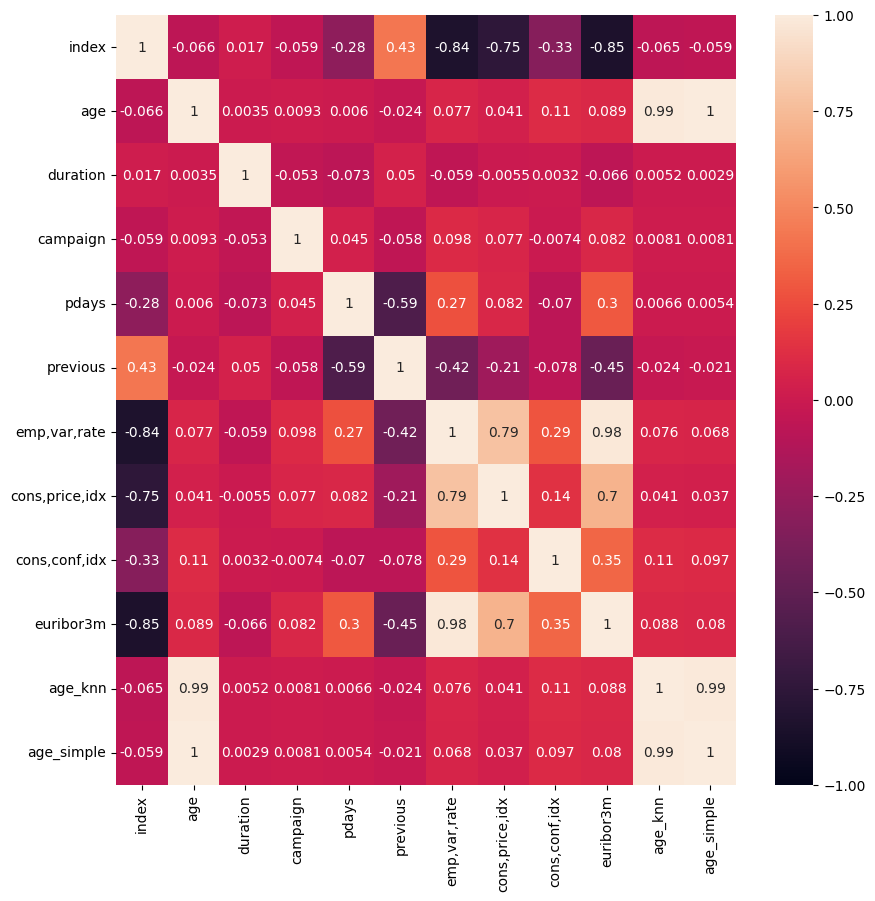

In [84]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1);

Hemos intentado comprobar si la variable edad tiene relación con otras, pero hemos comprobado que no la tiene.

2. Guardad el csv.

In [85]:
df.to_csv('data/bank_clean5.csv')